# Рассмотрим данные поулченные с помощью librosa из mp3




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


data_dir = "C://Users//egorg//hse-ai-year-project-2025//audio_features_final.csv"

In [2]:
track_df = pd.read_csv("C://Users//egorg//hse-ai-year-project-2025//audio_features_final.csv")
print(track_df.shape)
track_df

(2001, 25)


,track_id,tempo_main,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,tembrales_diff_mean,chroma_0,...,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,loudness,energy_variance,average_frequency,zero_crossing
0,1000957,129.199219,-111.657639,101.995781,6.230077,35.787262,8.498054,11.118729,30.564219,0.379602,...,0.244897,0.573891,0.315072,0.294535,0.249656,0.375843,0.188663,0.081949,1859.745962,0.071343
1,1001519,123.046875,-31.895020,79.137146,-2.187841,30.944529,9.425172,9.723009,31.688475,0.553371,...,0.415337,0.559024,0.534943,0.521442,0.486876,0.550188,0.262384,0.099253,2618.489582,0.118994
2,1002052,143.554688,-176.316956,102.904121,21.101460,22.574986,0.810848,-5.859491,31.090467,0.541046,...,0.202149,0.356775,0.166575,0.169225,0.145387,0.311556,0.145544,0.060082,1768.116845,0.055370
3,1007842,80.749512,-81.404396,108.682724,11.652451,38.853889,6.648099,7.111445,26.239069,0.254182,...,0.412013,0.451217,0.286667,0.326026,0.243252,0.311321,0.214316,0.060950,1837.339004,0.069498
4,1007988,135.999178,-104.157242,75.414017,1.235199,26.378925,7.279484,9.243151,28.219276,0.305525,...,0.384677,0.322161,0.509225,0.403465,0.350756,0.523776,0.118063,0.046793,2564.623642,0.113458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,992660,151.999081,-35.673527,74.225159,5.496143,25.326361,8.164667,14.779334,32.761196,0.296786,...,0.288858,0.299334,0.398958,0.351255,0.534033,0.332854,0.253136,0.087429,2622.119484,0.104978
1997,992661,123.046875,-100.047150,95.772957,-1.921893,8.784819,14.614493,17.219145,35.468456,0.494673,...,0.313964,0.399905,0.285865,0.327177,0.284381,0.396777,0.204618,0.092117,2090.340742,0.083298
1998,997366,89.102909,-72.318428,90.250999,-5.563820,30.983868,20.586790,16.797421,30.083900,0.545773,...,0.483404,0.447524,0.350622,0.367700,0.347636,0.422804,0.250474,0.120786,2200.372370,0.084244
1999,998853,99.384014,-53.362576,71.880783,16.520884,17.899729,2.200689,14.331462,28.760719,0.525167,...,0.343289,0.400188,0.424642,0.672276,0.460772,0.431281,0.237586,0.087892,2823.915572,0.102525


In [3]:
print(track_df.columns)

Index(['track_id', 'tempo_main', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3',
       'mfcc_4', 'mfcc_5', 'tembrales_diff_mean', 'chroma_0', 'chroma_1',
       'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7',
       'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11', 'loudness',
       'energy_variance', 'average_frequency', 'zero_crossing'],
      dtype='object')


**track_id** - айди трека

**tempo_main** - BPM (темп в ударах в минуту)

**mfcc_0** - общая громкость

**mfcc_1** - баланс низких и высоких частот

**mfcc_2** - коэффициент формы спектра 2

**mfcc_3** - коэффициент формы спектра 3

**mfcc_4** - коэффициент формы спектра 4

**mfcc_5** - коэффициент формы спектра 5

**tembrales_diff_mean** - вариативность изменения MFCC коэффициентов во времени

**chroma_0 до chroma_11** - громкости нот в 12 полутонах хроматической гаммы (C, C#, D, ..., B)

**loudness** - средняя громкость трека

**energy_variance** - отклонения по громкости

**average_frequency** - среднее значение частоты спектрального центроида

**zero_crossing** - показатель количества резких звуков и шумов

## Далее расмотрим распределения параметров, чтобы визуальо оценить их на адекватность и количество аномалий

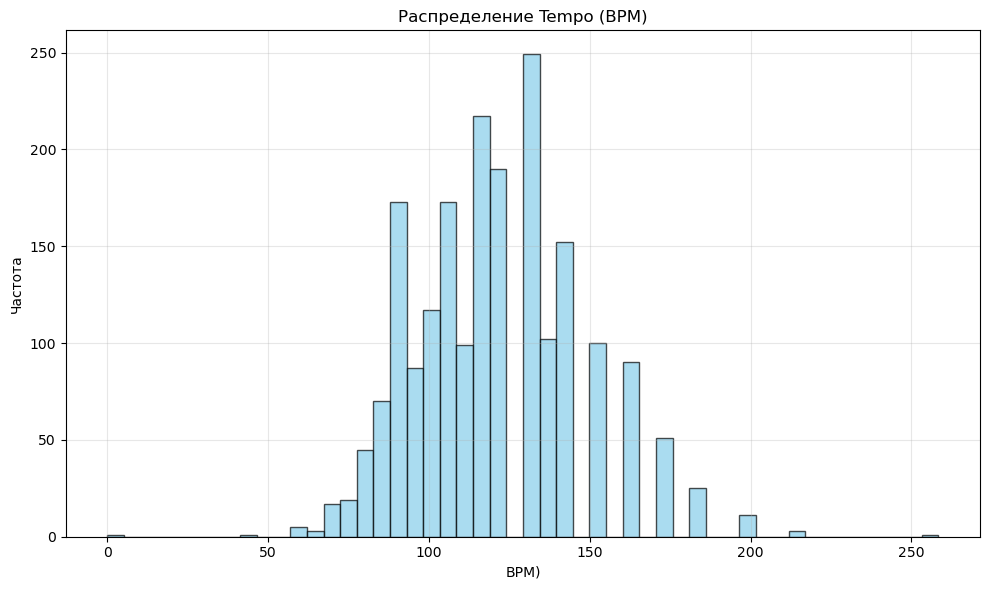

Темп: mean=120.2, std=25.8


In [4]:
plt.figure(figsize=(10, 6))

plt.hist(track_df["tempo_main"].dropna(), bins=50, alpha=0.7, color="skyblue", edgecolor="black")

plt.title("Распределение Tempo (BPM)")
plt.xlabel("BPM)")
plt.ylabel("Частота")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Темп: mean={track_df['tempo_main'].mean():.1f}, std={track_df['tempo_main'].std():.1f}")

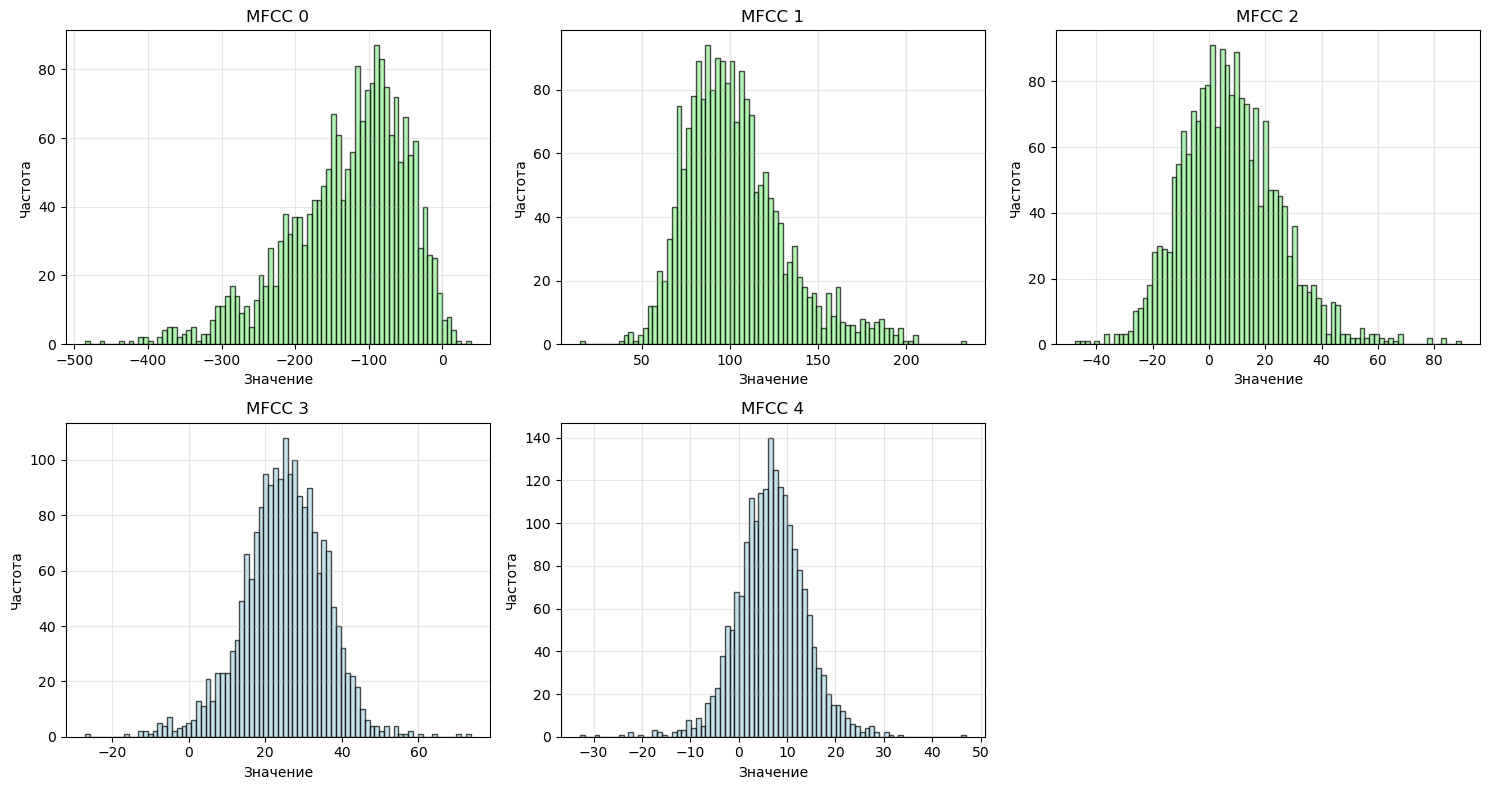

MFCC 0: mean=-128.33, std=79.67
MFCC 1: mean=102.74, std=28.41
MFCC 2: mean=7.53, std=17.26


In [5]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i in range(3):
    axes[0, i].hist(track_df[f"mfcc_{i}"].dropna(), bins=80, alpha=0.7, color="lightgreen", edgecolor="black")
    axes[0, i].set_title(f"MFCC {i}")
    axes[0, i].set_xlabel("Значение")
    axes[0, i].set_ylabel("Частота")
    axes[0, i].grid(True, alpha=0.3)

for i in range(3, 5):
    axes[1, i-3].hist(track_df[f"mfcc_{i}"].dropna(), bins=80, alpha=0.7, color="lightblue", edgecolor="black")
    axes[1, i-3].set_title(f"MFCC {i}")
    axes[1, i-3].set_xlabel("Значение")
    axes[1, i-3].set_ylabel("Частота")
    axes[1, i-3].grid(True, alpha=0.3)

axes[1, 2].set_visible(False)

plt.tight_layout()
plt.show()

for i in range(3):
    print(f"MFCC {i}: mean={track_df[f'mfcc_{i}'].mean():.2f}, std={track_df[f'mfcc_{i}'].std():.2f}")

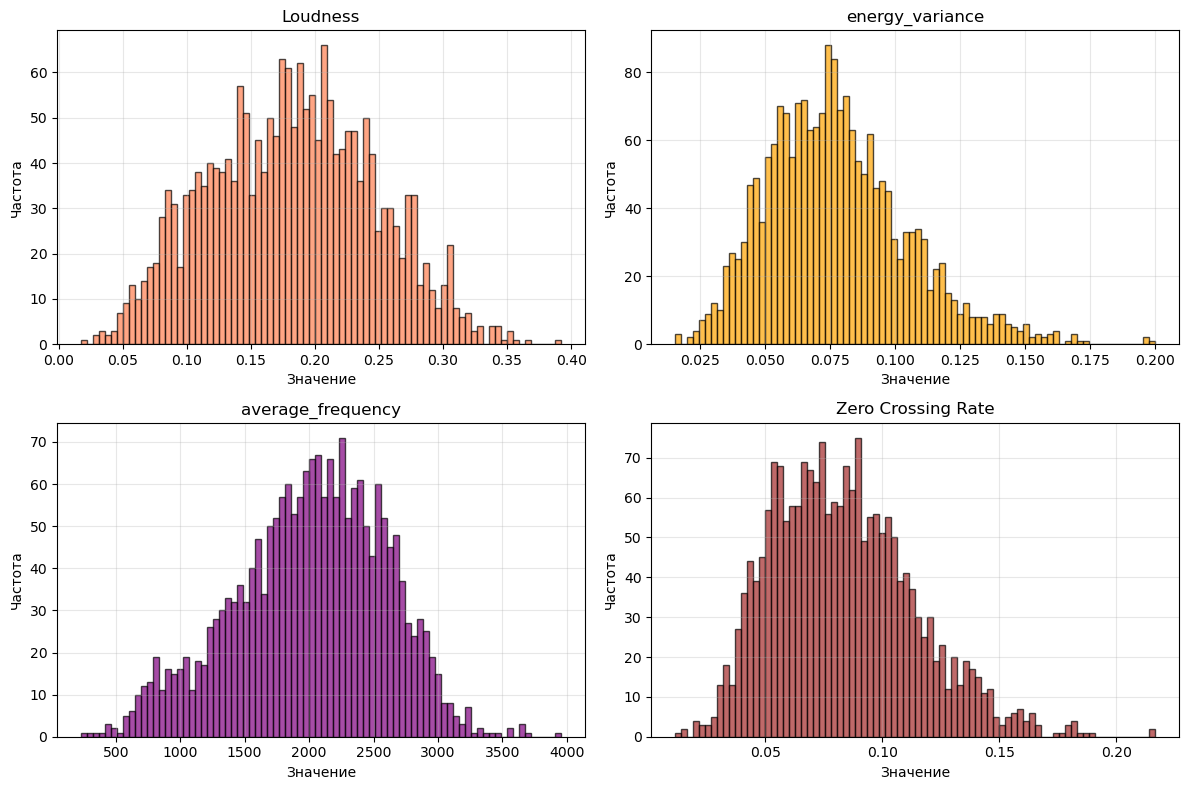

Громкость: mean=0.1820, std=0.0646
Дисперсия энергии: mean=0.0777, std=0.0269
Спектральный центроид: mean=2008.5, std=585.8
Zero Crossing: mean=0.0833, std=0.0302


In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0,0].hist(track_df["loudness"].dropna(), bins=80, alpha=0.7, color="coral", edgecolor="black")
axes[0,0].set_title("Loudness")
axes[0,0].set_xlabel("Значение")
axes[0,0].set_ylabel("Частота")
axes[0,0].grid(True, alpha=0.3)

axes[0,1].hist(track_df["energy_variance"].dropna(), bins=80, alpha=0.7, color="orange", edgecolor="black")
axes[0,1].set_title("energy_variance")
axes[0,1].set_xlabel("Значение")
axes[0,1].set_ylabel("Частота")
axes[0,1].grid(True, alpha=0.3)

axes[1,0].hist(track_df["average_frequency"].dropna(), bins=80, alpha=0.7, color="purple", edgecolor="black")
axes[1,0].set_title("average_frequency")
axes[1,0].set_xlabel("Значение")
axes[1,0].set_ylabel("Частота")
axes[1,0].grid(True, alpha=0.3)

axes[1,1].hist(track_df["zero_crossing"].dropna(), bins=80, alpha=0.7, color="brown", edgecolor="black")
axes[1,1].set_title("Zero Crossing Rate")
axes[1,1].set_xlabel("Значение")
axes[1,1].set_ylabel("Частота")
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Громкость: mean={track_df['loudness'].mean():.4f}, std={track_df['loudness'].std():.4f}")
print(f"Дисперсия энергии: mean={track_df['energy_variance'].mean():.4f}, std={track_df['energy_variance'].std():.4f}")
print(f"Спектральный центроид: mean={track_df['average_frequency'].mean():.1f}, std={track_df['average_frequency'].std():.1f}")
print(f"Zero Crossing: mean={track_df['zero_crossing'].mean():.4f}, std={track_df['zero_crossing'].std():.4f}")

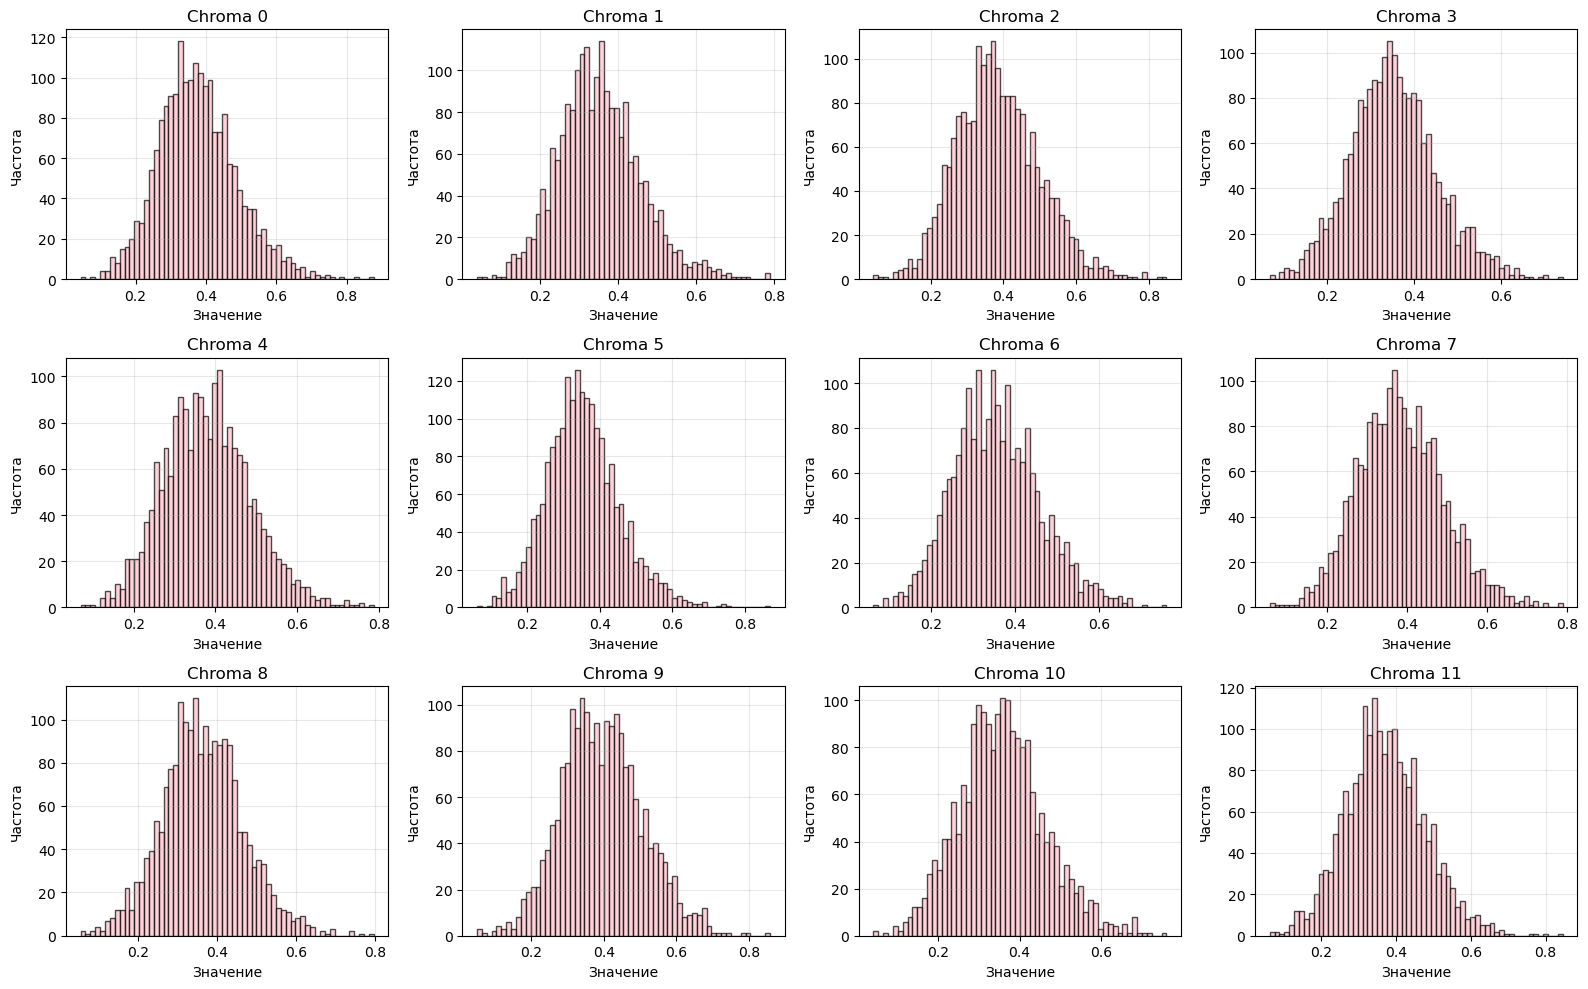

In [7]:
fig, axes = plt.subplots(3, 4, figsize=(16, 10))

for i in range(12):
    row, col = i // 4, i % 4
    axes[row, col].hist(track_df[f"chroma_{i}"].dropna(), bins=60, alpha=0.7, color="pink", edgecolor="black")
    axes[row, col].set_title(f"Chroma {i}")
    axes[row, col].set_xlabel("Значение")
    axes[row, col].set_ylabel("Частота")
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

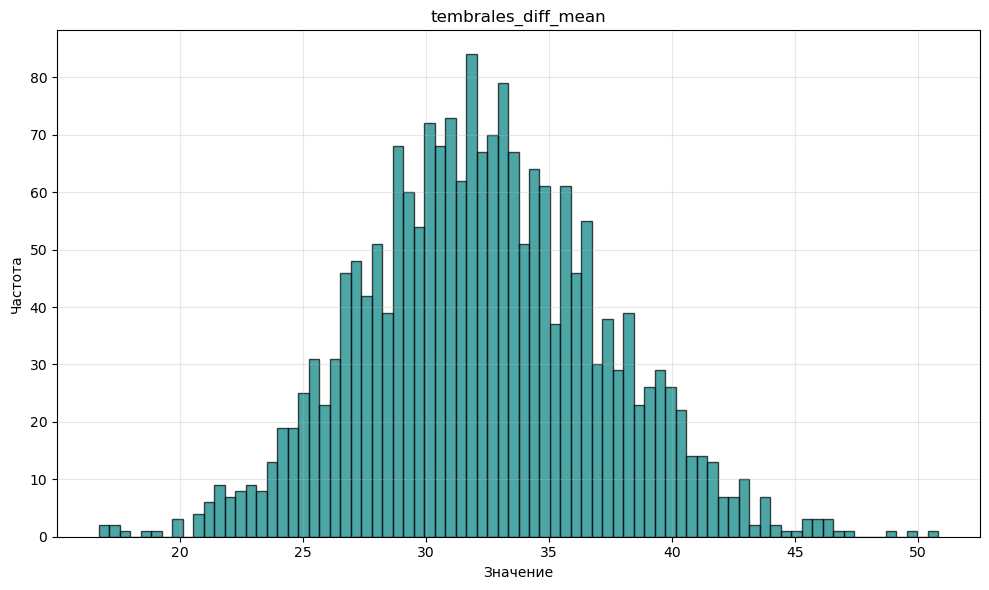

Тембральная разница: mean=32.2912, std=4.8826


In [8]:
plt.figure(figsize=(10, 6))

plt.hist(track_df["tembrales_diff_mean"].dropna(), bins=80, alpha=0.7, color="teal", edgecolor="black")
plt.title("tembrales_diff_mean")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Тембральная разница: mean={track_df['tembrales_diff_mean'].mean():.4f}, std={track_df['tembrales_diff_mean'].std():.4f}")

### Как мы видим все признаки имеют адекватные распределения, что делает возможным последующий анализ полученных дланных 

Синтезируем признак тональности на основе признаков chroma добавим
tonality: 1 - мажор, 0 минор 

In [9]:
chroma_cols = [f"chroma_{i}" for i in range(12)]

major_notes = [0, 2, 4, 5, 7, 9, 11]  # C, D, E, F, G, A, B
minor_notes = [0, 2, 3, 5, 7, 8, 10]  # C, D, D#, F, G, G#, A#

major_score = track_df[[f"chroma_{i}" for i in major_notes]].sum(axis=1)
minor_score = track_df[[f"chroma_{i}" for i in minor_notes]].sum(axis=1)

track_df["tonality"] = (major_score > minor_score).astype(int)

print(track_df["tonality"].value_counts())

tonality
1    1295
0     706
Name: count, dtype: int64


### Базовый t-SNE без визуализации

In [10]:
audio_features = ["tempo_main", "loudness", "average_frequency", "zero_crossing", 
                 "energy_variance", "tembrales_diff_mean"] + \
                 [f"mfcc_{i}" for i in range(6)] + \
                 [f"chroma_{i}" for i in range(12)]

X = track_df[audio_features].fillna(0)
X_scaled = StandardScaler().fit_transform(X)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

track_df["tsne_x"] = X_tsne[:, 0]
track_df["tsne_y"] = X_tsne[:, 1]


c:\Users\egorg\miniconda3\envs\audio-env\lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


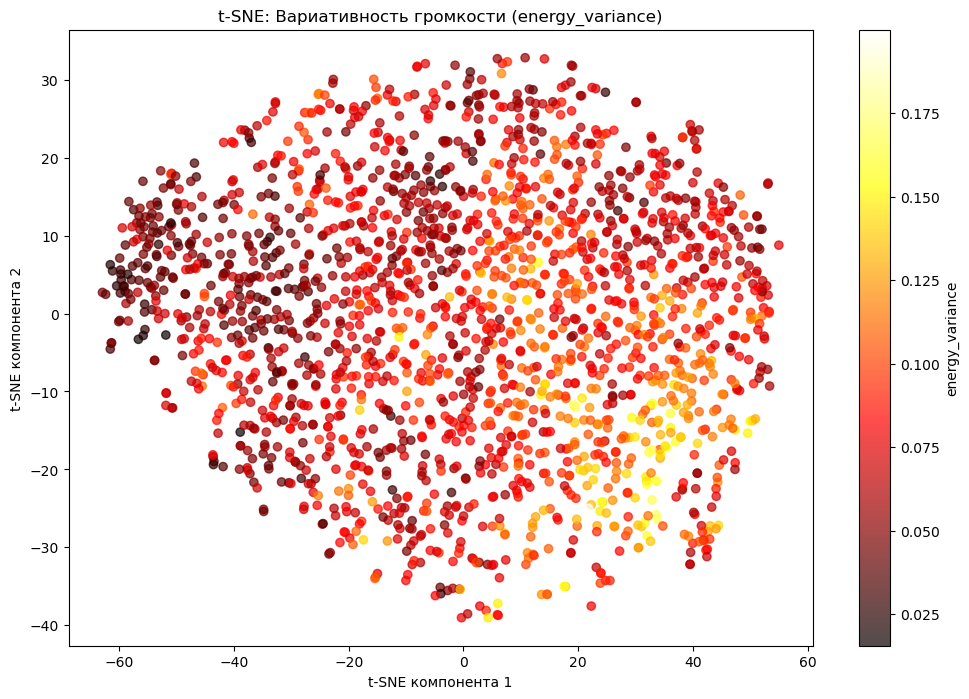

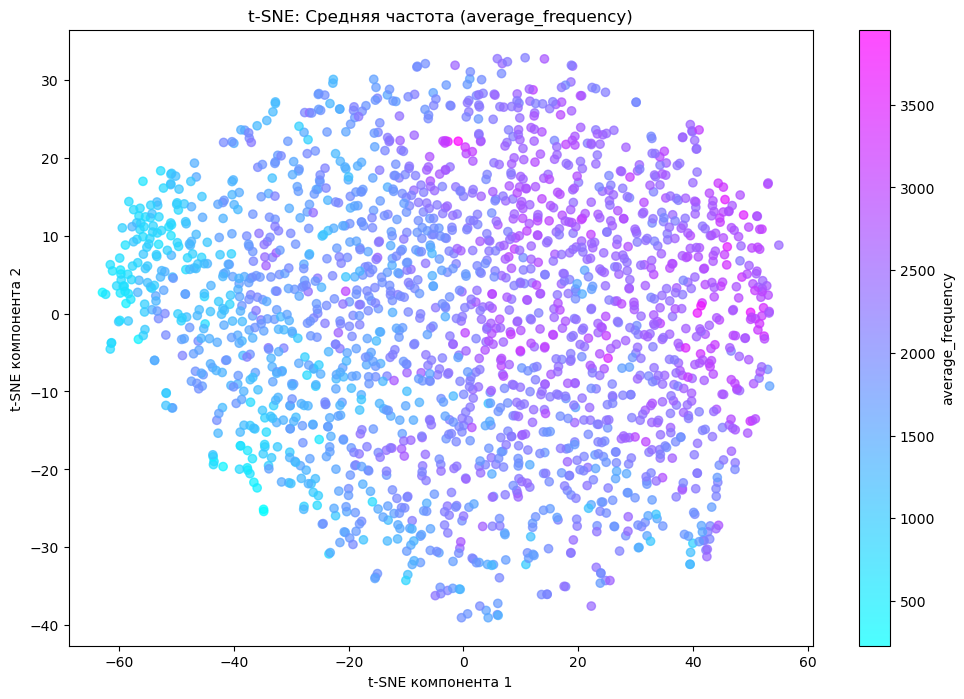

In [11]:
plt.figure(figsize=(12, 8))

scatter = plt.scatter(track_df["tsne_x"], track_df["tsne_y"], 
                     c=track_df["energy_variance"], cmap="hot", alpha=0.7)
plt.title("t-SNE: Вариативность громкости (energy_variance)")
plt.colorbar(scatter, label="energy_variance")
plt.xlabel("t-SNE компонента 1")
plt.ylabel("t-SNE компонента 2")

plt.show()

plt.figure(figsize=(12, 8))

scatter = plt.scatter(track_df["tsne_x"], track_df["tsne_y"], 
                     c=track_df["average_frequency"], cmap="cool", alpha=0.7)
plt.title("t-SNE: Средняя частота (average_frequency)")
plt.colorbar(scatter, label="average_frequency")
plt.xlabel("t-SNE компонента 1")
plt.ylabel("t-SNE компонента 2")

plt.show()

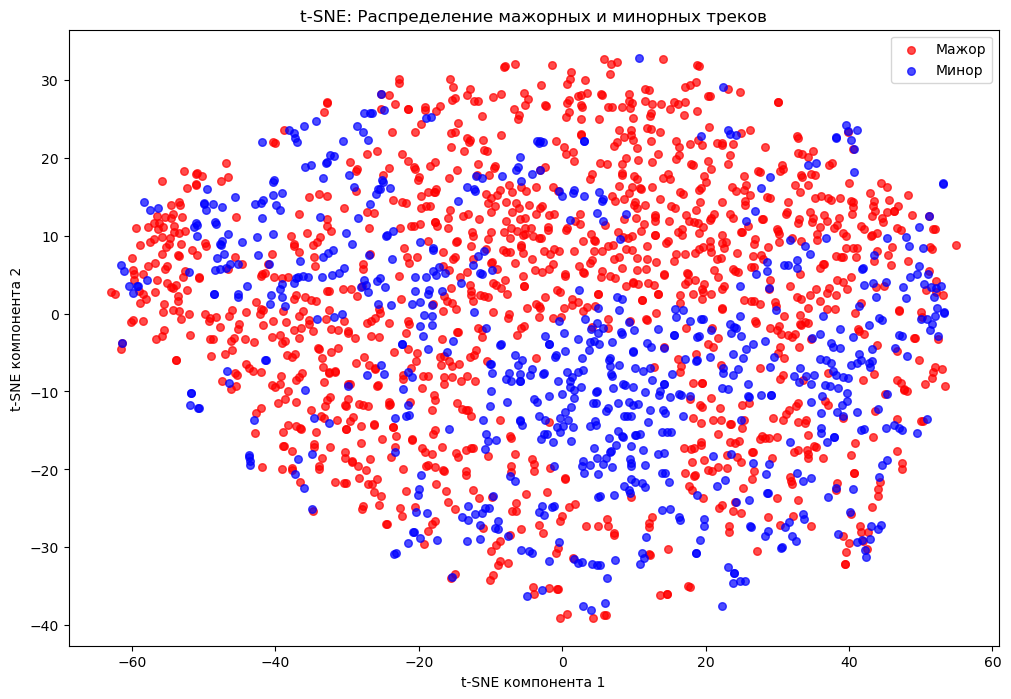

In [12]:
plt.figure(figsize=(12, 8))

# Мажорные треки - красные
plt.scatter(track_df[track_df['tonality'] == 1]['tsne_x'], 
            track_df[track_df['tonality'] == 1]['tsne_y'], 
            c='red', alpha=0.7, label='Мажор', s=30)

plt.scatter(track_df[track_df['tonality'] == 0]['tsne_x'], 
            track_df[track_df['tonality'] == 0]['tsne_y'], 
            c='blue', alpha=0.7, label='Минор', s=30)

plt.title('t-SNE: Распределение мажорных и минорных треков')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.legend()
plt.show()

## Выводы по t-SNE анализу

- Четкая кластеризация отсутствует, что ожидаемо для музыкальных данных
- Наблюдаются локальные группировки треков
- По средней частоте виден плавный переход между треками
- Мажоры и миноры не образуют отдельных кластеров, но показывают локальные сгустки